# Probabilities for Linear Leios

## Formulation

Let $f$ be the active slot coefficient for Praos. By definition, this is the probability that at least one RB is created in a given slot.

Let $p_\text{cert}$ be the probability that a new Praos block contains an certificate for the EB referenced in the previous block. Linear Leios requires that a certificate may only be included in an RB if the previous $L_\text{vote} + L_\text{diff}$ slots did not contain an RB. Assuming that all nodes are following the same fork, this implies

$$
p_\text{cert} = (1 - f) ^ {(L_\text{vote} + L_\text{diff})} .
$$

Let $\rho$ be the ratio of the maximum size of an EB to the maximum size of an RB. Also let $\digamma$ be the ratio of Leios throughput to Praos throughput. One computes this as

$$
\digamma = (1 - p_\text{cert}) + p_\text{cert} \cdot (1 + \rho) = 1 + \rho \cdot (1 - f) ^ {(L_\text{vote} + L_\text{diff})}
$$

We define *throughput efficiency* as the ratio of the size of RBs and RB-certified EBs all divided by the size of all RBs and EBs.

$$
\varepsilon = \frac{1 + \rho \cdot (1 - f) ^ {(L_\text{vote} + L_\text{diff})}}{1 + \rho}
$$

## Analysis

### Setup

In [1]:
suppressMessages({
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

### Throughput

In [2]:
throughput <- function(rho, L, f=0.05)
    1 + rho * (1 - f)^(2*L)

In [3]:
tpResult <- CJ(`rho`=c(1,10,100,1000), `L`=4:10, `finv`=c(20,25,30))[,
    .(
        `Maximum EB size`=factor(paste0(`rho`, "× Praos"), levels=paste0(c(1,10,100,1000), "× Praos")),
        `L`, 
        `Active slots`=factor(paste0("1/", `finv`, " RB/slot")),
        `throughput`=mapply(throughput, `rho`, `L`, 1/`finv`),
        `efficiency`=mapply(throughput, `rho`, `L`, 1/`finv`)/(1 + `rho`)
    )
]

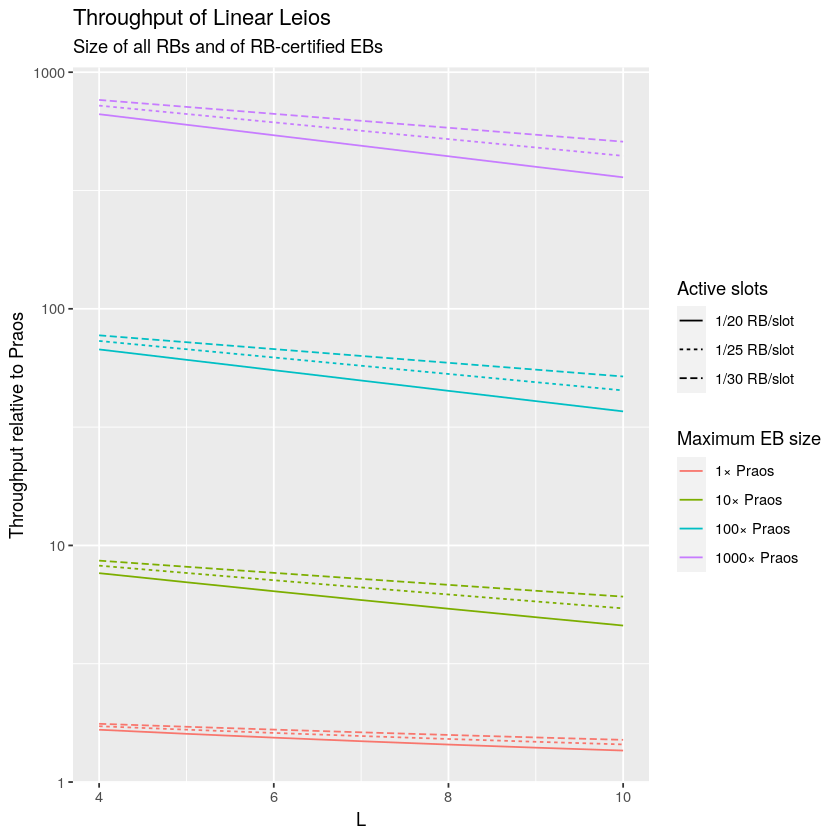

In [4]:
ggplot(tpResult, aes(x=`L`, y=`throughput`, color=`Maximum EB size`, linetype=`Active slots`)) +
    geom_line() +
    scale_y_log10() +
    xlab("L") +
    ylab("Throughput relative to Praos") +
    ggtitle(
        "Throughput of Linear Leios",
        "Size of all RBs and of RB-certified EBs"
    )

In [5]:
ggsave("linear-leios-throughput.svg", units="in", dpi=150, width=8, height=6)

In [6]:
ggsave("linear-leios-throughput.png", units="in", dpi=150, width=8, height=6)

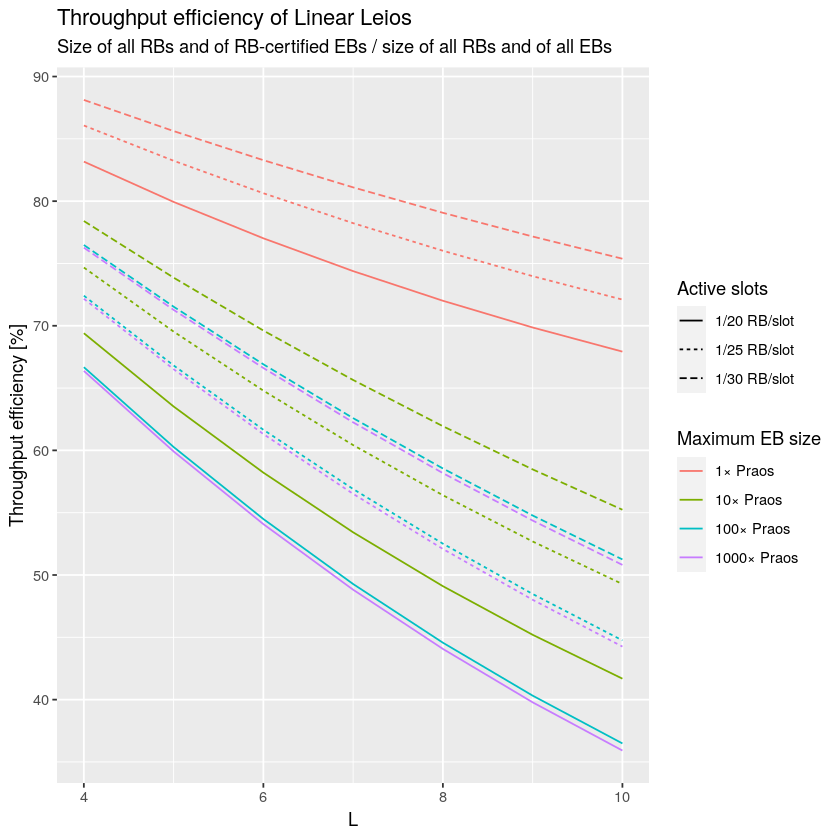

In [7]:
ggplot(tpResult, aes(x=`L`, y=100*`efficiency`, color=`Maximum EB size`, linetype=`Active slots`)) +
    geom_line() +
#   ylim(0, 100) +
    xlab("L") +
    ylab("Throughput efficiency [%]") +
    ggtitle(
        "Throughput efficiency of Linear Leios",
        "Size of all RBs and of RB-certified EBs / size of all RBs and of all EBs"
    )

In [8]:
ggsave("linear-leios-efficiency.svg", units="in", dpi=150, width=8, height=6)

In [9]:
ggsave("linear-leios-efficiency.png", units="in", dpi=150, width=8, height=6)